In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread('/content/drive/MyDrive/Thesis_photo/static/Figure_1.png',0)


In [4]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
thresh2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                                    cv2.THRESH_BINARY,11,2)
thresh3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY,11,2)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f3ce3921c90>,
 <matplotlib.image.AxesImage at 0x7f3ce38aae10>)

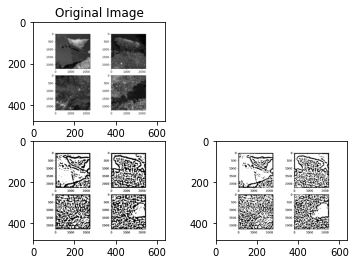

In [15]:
plt.subplot(221), plt.imshow(img,'gray')
plt.title('Original Image')
plt.subplot(223), plt.imshow(thresh2, 'gray')
#plt.title('ADAPTIVE_MEANC')
plt.subplot(224), plt.imshow(thresh3, 'gray')
#plt.title('ADAPTIVE_GAUSSIANC')

In [16]:
plt.show()

In [19]:
def block_fn(x,center_val):

    unique_elements, counts_elements = np.unique(x.ravel(), return_counts=True)

    if np.isnan(center_val):
        return np.nan
    elif center_val == 1:
        return 1.0
    else:
        return unique_elements[np.argmax(counts_elements)]

In [20]:
def majority_filter(x,block_size = (3,3)):

    #Odd block sizes only  ( ? )
    assert(block_size[0]%2 != 0 and block_size[1]%2 !=0)

    yy =int((block_size[0]-1)/2)
    xx =int((block_size[1]-1)/2)


    output= np.zeros_like(x)
    for i in range(0,x.shape[0]):
        miny,maxy = max(0,i-yy),min(x.shape[0]-1,i+yy)

        for j in range(0,x.shape[1]):
            minx,maxx = max(0,j-xx),min(x.shape[1]-1,j+xx)

            #Extract block to take majority filter over
            block=x[miny:maxy+1,minx:maxx+1]

            output[i,j] = block_fn(block,center_val=x[i,j])
        
     
    return output


In [18]:
inp=np.array([[ 1.,  1.,  1.,  0.,  0.],
       [ 1.,  1., np.nan,  1.,  1.],
       [np.nan,  1.,  1.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.]])


print(majority_filter(inp))

[[ 1.  1.  1.  1.  0.]
 [ 1.  1. nan  1.  1.]
 [nan  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  1.]]
